<a href="https://colab.research.google.com/github/Frost-Codes/LSTM-Model/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Yahoo Finance API to download historical dataset ***

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing some liblaries that we'll use for analysis**

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from matplotlib import pyplot as plt

**Downloading the dataset and having a basic overview of it's distribution**

In [ ]:
import datetime
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()
data = yf.download('CL=F',period='1y',interval='1h', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.shape

(5645, 5)

In [ ]:
data.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2022-06-08 06:00:00-04:00,121.220001,121.370003,120.629997,120.690002,0
2022-06-08 07:00:00-04:00,120.699997,120.739998,120.459999,120.669998,6605
2022-06-08 08:00:00-04:00,120.660004,121.010002,120.379997,120.739998,13534
2022-06-08 09:00:00-04:00,120.739998,120.790001,119.830002,119.879997,29637
2022-06-08 10:00:00-04:00,119.889999,120.730003,119.440002,120.690002,38876


In [ ]:
data.tail()

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-06-08 02:00:00-04:00,72.489998,72.669998,72.379997,72.650002,2775
2023-06-08 03:00:00-04:00,72.639999,72.849998,72.470001,72.570000,8015
2023-06-08 04:00:00-04:00,72.570000,72.629997,72.129997,72.150002,14578
2023-06-08 05:00:00-04:00,72.139999,72.779999,72.070000,72.769997,7574
2023-06-08 06:00:00-04:00,72.779999,72.830002,72.769997,72.790001,0


**Resetting the index column & dropping columns that we do not need**

In [ ]:
data = data.reset_index()

In [ ]:
data.drop(['Datetime', 'Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)

**Plotting the close price**

<Axes: >

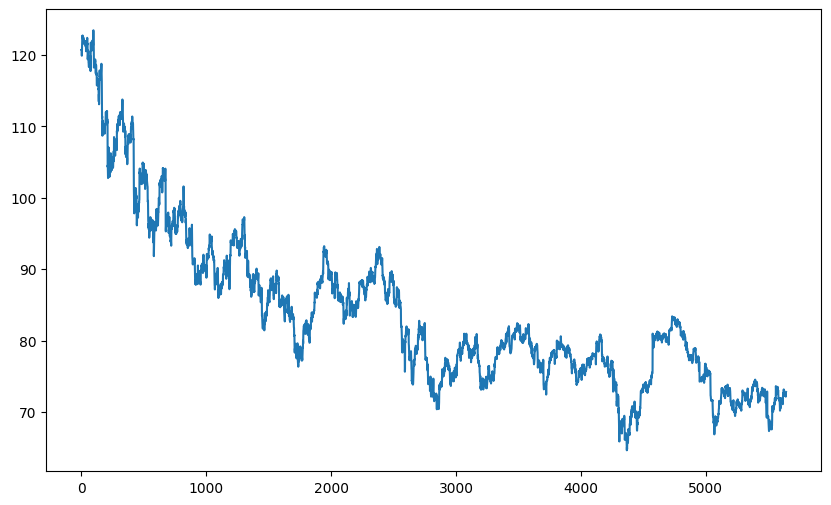

In [ ]:
data['Close'].plot(figsize=(10,6))

**Plotting with SMAs**

<Axes: title={'center': 'Close price with SMA1 at 100 and SMA2 at 200'}>

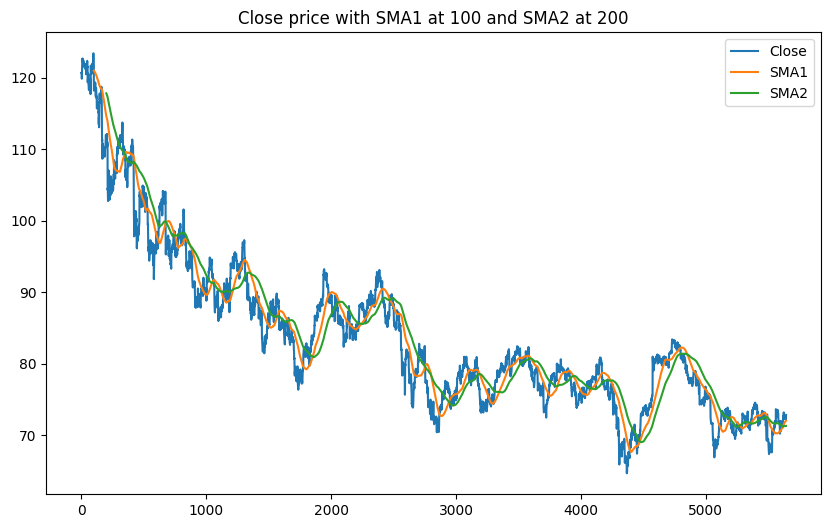

In [ ]:
data['SMA1'] = data['Close'].rolling(100).mean()
data['SMA2'] = data['Close'].rolling(200).mean()
data.plot(figsize=(10,6), title='Close price with SMA1 at 100 and SMA2 at 200')

In [ ]:
## split data to trainning and testing
data_trainnig = pd.DataFrame(data['Close'][0:int(len(data)*0.8)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.8):])
print(data_trainnig.shape)
print(data_testing.shape)

(4516, 1)
(1129, 1)


In [ ]:
# scale down the trainning data to range 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_trainnig_scaled = scaler.fit_transform(data_trainnig)
data_trainnig_scaled.shape

(4516, 1)

In [ ]:
type(data_trainnig_scaled)

numpy.ndarray

In [ ]:
## split data into x_train and y_train with 100 sma
x_train = []
y_train = []

for i in range(14, data_trainnig_scaled.shape[0]):
  x_train.append(data_trainnig_scaled[i-14:i])
  y_train.append(data_trainnig_scaled[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(4502, 14, 1)
(4502,)


In [ ]:
x_train

array([[[0.27151372],
        [0.26498135],
        [0.27293378],
        ...,
        [0.24112442],
        [0.24254447],
        [0.23487633]],

       [[0.26498135],
        [0.27293378],
        [0.26498135],
        ...,
        [0.24254447],
        [0.23487633],
        [0.23203623]],

       [[0.27293378],
        [0.26498135],
        [0.25788109],
        ...,
        [0.23487633],
        [0.23203623],
        [0.21613173]],

       ...,

       [[0.73132638],
        [0.74495866],
        [0.75262715],
        ...,
        [0.75092281],
        [0.74950276],
        [0.75177498]],

       [[0.74495866],
        [0.75262715],
        [0.75433114],
        ...,
        [0.74950276],
        [0.75177498],
        [0.75063887]],

       [[0.75262715],
        [0.75433114],
        [0.76341933],
        ...,
        [0.75177498],
        [0.75063887],
        [0.7568873 ]]])

In [ ]:
## Model
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential


In [ ]:
## add layers to model

model = Sequential()
model.add(LSTM(units=90, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=100, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=110, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [ ]:
## summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 90)            33120     
                                                                 
 dropout (Dropout)           (None, 14, 90)            0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 100)           76400     
                                                                 
 dropout_1 (Dropout)         (None, 14, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 14, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 14, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 14, 110)           9

In [ ]:
## trainning model
%%time
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'mae'])
history = model.fit(x_train, y_train, epochs=75)

Epoch 1/75
141/141 [==============================] - 14s 60ms/step - loss: 0.0194 - accuracy: 4.4425e-04 - mae: 0.0902
Epoch 2/75
141/141 [==============================] - 10s 69ms/step - loss: 0.0054 - accuracy: 4.4425e-04 - mae: 0.0530
Epoch 3/75
141/141 [==============================] - 10s 69ms/step - loss: 0.0049 - accuracy: 4.4425e-04 - mae: 0.0511
Epoch 4/75
141/141 [==============================] - 10s 69ms/step - loss: 0.0045 - accuracy: 4.4425e-04 - mae: 0.0486
Epoch 5/75
141/141 [==============================] - 8s 60ms/step - loss: 0.0040 - accuracy: 4.4425e-04 - mae: 0.0447
Epoch 6/75
141/141 [==============================] - 10s 70ms/step - loss: 0.0032 - accuracy: 4.4425e-04 - mae: 0.0406
Epoch 7/75
141/141 [==============================] - 10s 69ms/step - loss: 0.0032 - accuracy: 4.4425e-04 - mae: 0.0402
Epoch 8/75
141/141 [==============================] - 9s 66ms/step - loss: 0.0031 - accuracy: 4.4425e-04 - mae: 0.0388
Epoch 9/75
141/141 [======================

In [ ]:
# saving model
from google.colab import files

In [ ]:
# saving to local host
model.save('oneHourModel.h5')
files.download('oneHourModel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# saving to gdrive
model_save_name = 'oneHourModel.h5'
path = f"/content/drive/MyDrive/Project/{model_save_name}"
model.save(filepath=path)

In [ ]:
import os
os.listdir('/content/drive/MyDrive/Project')

['dailyModel.h5', 'oneHourModel.h5']

**Checking Testing data**

In [ ]:
data_testing.head()

,Close
4516,73.830002
4517,73.650002
4518,74.059998
4519,74.150002
4520,73.980003


In [ ]:
data_testing.tail(1)

,Close
5644,72.809998


In [ ]:
data_trainnig.tail()

,Close
4511,73.629997
4512,73.570000
4513,73.599998
4514,73.739998
4515,73.709999


In [ ]:
last_in_trainning = data_trainnig.tail(14)

In [ ]:
trainning_testing = last_in_trainning.append(data_testing, ignore_index=True)

<ipython-input-31-44605c8cbe74>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainning_testing = last_in_trainning.append(data_testing, ignore_index=True)


In [ ]:
# scale down testing data
final_testing = scaler.fit_transform(trainning_testing)

In [ ]:
final_testing.shape

(1143, 1)

In [ ]:
# split to x test and y test
x_test = []
y_test =[]

for i in range(14, final_testing.shape[0]):
  x_test.append(final_testing[i-14:i])
  y_test.append(final_testing[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1129, 14, 1)
(1129,)


**Making predictions**

In [ ]:
y_predicted = model.predict(x_test)
y_predicted.shape

36/36 [==============================] - 1s 16ms/step


(1129, 1)

In [ ]:
loss, acc, mae = model.evaluate(y_predicted, y_test)

36/36 [==============================] - 1s 6ms/step - loss: 0.0696 - accuracy: 8.8574e-04 - mae: 0.2039


In [ ]:
print(acc * 100)

0.0885739573277533


In [ ]:
y_predicted[0].shape

(1,)

In [ ]:
# find scale factor
scaler.scale_

array([0.0605327])

In [ ]:
scale_factor = 1/scaler.scale_

In [ ]:
y_predicted_scaled = y_predicted * scale_factor
y_test_scaled = y_test * scale_factor ###

In [ ]:
last_testing = data_testing.tail(5)

In [ ]:
last_testing = np.array(last_testing['Close'])

In [ ]:
last_testing

array([72.65000153, 72.56999969, 72.15000153, 72.76999664, 72.80999756])

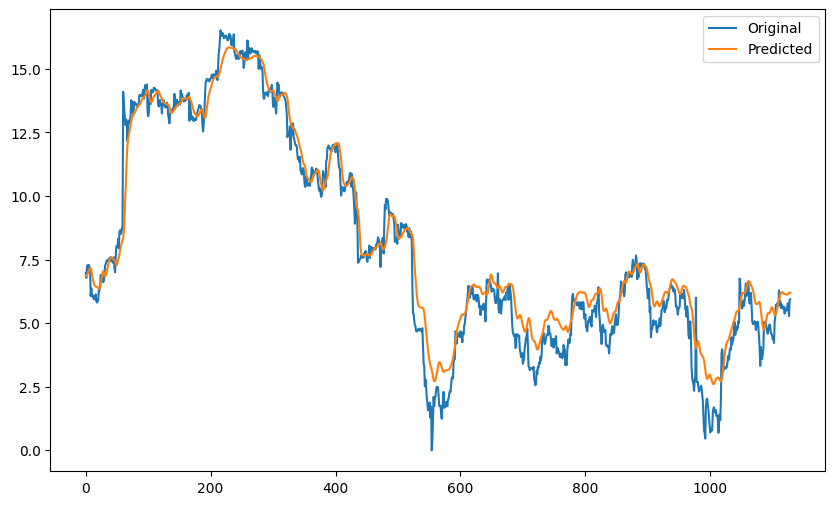

In [ ]:
# plotting
plt.figure(figsize=(10,6))
plt.plot(y_test_scaled, label='Original')
plt.plot(y_predicted_scaled, label='Predicted')
plt.legend()
plt.show()
